# <font color = tomato>EDA - Analysis

## <font color = grey> Admin

In [4]:
import pandas as pd
import os
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

Base directory set to: /root


---

#### <font color = grey> Load Data and Basic Information

In [ ]:
import pandas as pd

# Define the file path
# parsed_file_path = '/home/sagemaker-user/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'
parsed_file_path = '/root/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'

# Load the data into a DataFrame
df = pd.read_csv(parsed_file_path, sep=';')

# Display basic information about the DataFrame
print("Basic Information:")
print(df.info())

# Display the first few lines of the DataFrame
print("\nFirst few lines:")
df.head(10)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747963 entries, 0 to 4747962
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   event_type  int64  
 2   seq_id      object 
 3   time        float64
 4   label       object 
 5   eventlabel  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 217.3+ MB
None

First few lines:


,id,event_type,seq_id,time,label,eventlabel
0,1,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
1,2,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
2,3,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
3,4,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
4,5,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
5,6,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
6,7,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
7,8,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
8,9,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
9,10,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal


___
# <font color = teal> Review Evaluation Script

___
### <font color = orange> Explanation | Script

> The evaluate.py script is designed to evaluate various anomaly detection methods on log sequences. 

>> It includes functions for training models, testing models, and evaluating the performance of the models using different techniques like count vector clustering, n-grams, and edit distance. 

>> The script also handles timing-based detection if specified.

#### <font color = green> Functions

> train_cluster_count_vectors(): Trains models using count vectors from sequences.

> iterate_threshold(): Iterates over different thresholds to detect anomalies.

> test_cluster_count_vectors(): Tests count vector models on test sequences.

> get_best(): Finds the best threshold that maximizes the F1 score.

> test_edit_distance(): Computes the minimum edit distance for test sequences.

> check_count_vector(): Computes the distance of test vectors to the most similar training vectors.

> get_vectors(): Transforms sequences into count vectors.

> get_fone(): Computes the F1 score.

> evaluate(): Evaluates the performance by counting true positives, false negatives, true negatives, and false positives.

> print_results(): Prints and returns the evaluation metrics.

> read_lines(): Reads sequences from files.

> get_known_event_types(): Returns a set of known event types from training data.

> detect_known_event_types(): Detects sequences with unknown event types.

> get_length_range(): Gets the range of sequence lengths.

> detect_length(): Detects sequences with abnormal lengths

> train_ngram(): Trains n-gram models.

> train_ngram_cv(): Trains n-gram count vector models.

> get_ngram_cv_vectors(): Gets n-gram count vectors for test sequences.

> detect_ngram(): Detects anomalies using n-grams.

> get_event_times(): Computes event inter-arrival times.

> get_event_params(): Gets event parameters.

> get_word_dict(): Learns parameter values that occur in specific positions of event types.

> detect_word_dict(): Identifies sequences with new parameter values.

> find_time_range_rec(): Finds inter-arrival times of event pairs recursively.

> update_time_range(): Adapts inter-arrival times of event pairs.

> detect_event_times_range(): Detects sequences with deviating inter-arrival times.

> get_event_times_range(): Aggregates event pair inter-arrival times.

> evaluate_all(): Main function that loads data, trains models, evaluates models, and prints results.

#### <font color = green> Analysis of Script Execution

>  <font color = tomato>Locating the Execution Script

>> The script evaluate.py is executed from the same directory as the script itself. This can be inferred from the usage of relative paths for data directory handling and script execution in typical command-line operations.

> <font color = tomato>Data Sourcing

>* Data Directory: The data is sourced from the directory specified by the --data_dir argument. The default is hdfs_xu.
>* Files: The script expects specific training and test files in the data directory. These files are:

>>* <data_dir>_train

>>* <data_dir>_test_abnormal

>>* <data_dir>_test_normal

>>* If --time_detection is enabled, it also expects parsed.csv.

> <font color = tomato>Results Saving and Output

>> The script does not save results to a file directly. 

>> Instead, it prints the evaluation results to the console. The printed output includes various performance metrics like true positives, false negatives, true negatives, false positives, F1 score, accuracy, and more for each detection method applied.

___
# <font color = teal> Run Evaluation Script

### <font color = tomato> Install Dependencies

In [7]:
!pip install python-Levenshtein

  Using cached python_Levenshtein-0.25.1-py3-none-any.whl.metadata (3.7 kB)
Using cached python_Levenshtein-0.25.1-py3-none-any.whl (9.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 2.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 30.5 MB/s eta 0:00:00:00:01


In [10]:
!apt-get update

Get:1 http://archive.ubuntu.com/ubuntu jammy InRelease [270 kB]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2395 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy/restricted amd64 Packages [164 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy/universe amd64 Packages [17.5 MB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1858 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy/main amd64 Packages [1792 kB]     
Get:10 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 Packages [266 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2129 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2468 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-

In [11]:
!apt-get install -y build-essential

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  bzip2 dirmngr dpkg-dev fakeroot g++ g++-11 gnupg gnupg-l10n gnupg-utils gpg
  gpg-agent gpg-wks-client gpg-wks-server gpgconf gpgsm libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libassuan0 libdpkg-perl
  libfakeroot libfile-fcntllock-perl libksba8 liblocale-gettext-perl libnpth0
  libreadline8 libsqlite3-0 libstdc++-11-dev lto-disabled-list make
  pinentry-curses readline-common xz-utils
Suggested packages:
  bzip2-doc dbus-user-session libpam-systemd pinentry-gnome3 tor
  debian-keyring g++-multilib g++-11-multilib gcc-11-doc parcimonie xloadimage
  scdaemon bzr libstdc++-11-doc make-doc pinentry-doc readline-doc
The following NEW packages will be installed:
  build-essential bzip2 dirmngr dpkg-dev fakeroot g++ g++-11 gnupg gnupg-l10n
  gnupg-utils gpg gpg-agent gpg-wks-client gpg-wks-server gpgconf gpgsm
 

In [12]:
!pip install pylcs

  Using cached pylcs-0.1.1.tar.gz (11 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for pylcs: filename=pylcs-0.1.1-cp310-cp310-linux_x86_64.whl size=92008 sha256=f6d5e56e0bb5335fe986dada4191d255c6065b8d93ba685967bf189789c80e66
  Stored in directory: /root/.cache/pip/wheels/eb/64/e8/c902162e883f432251466566e011016795ea03b95d4350d0ee
Successfully built pylcs


___
### <font color = tomato> Run Script

In [16]:
!python3 /root/07.Scripts/20240602_bgl_evaluate_v1.20.py \
--data_dir /root/11.Data/01.BGL/04.Sampled_Parsed_CFDR


New event detection
 Time=0.10883665084838867
 TP=31429
 FP=912
 TN=36532
 FN=0
 TPR=R=1.0
 FPR=0.02435637218245914
 TNR=0.9756436278175409
 P=0.9718005009121549
 F1=0.9856986043594167
 ACC=0.9867582361738272
 MCC=0.9737201683362825

Sequence length detection
 Time=0.01528787612915039
 TP=847
 FP=134
 TN=37310
 FN=30582
 TPR=R=0.026949632505011294
 FPR=0.00357867749172097
 TNR=0.9964213225082791
 P=0.8634046890927625
 F1=0.05226781857451404
 ACC=0.5540197174509605
 MCC=0.0982401584454349

New events + sequence length detection
 Time=0.12412452697753906
 TP=31429
 FP=999
 TN=36445
 FN=0
 TPR=R=1.0
 FPR=0.0266798418972332
 TNR=0.9733201581027668
 P=0.9691932897495991
 F1=0.9843556696994847
 ACC=0.9854950415983041
 MCC=0.9712545320415347

Count vector clustering
 Threshold=0.11
 Time=47.850417375564575
 TP=30652
 FP=3382
 TN=34062
 FN=777
 TPR=R=0.9752776098507747
 FPR=0.09032154684328597
 TNR=0.909678453156714
 P=0.9006287829817241
 F1=0.936467928448131
 ACC=0.9396134914988457
 MCC=0.88

___
### <font color = tomato> Explanation | Result

___
# <font color = teal> Backup Screenshots

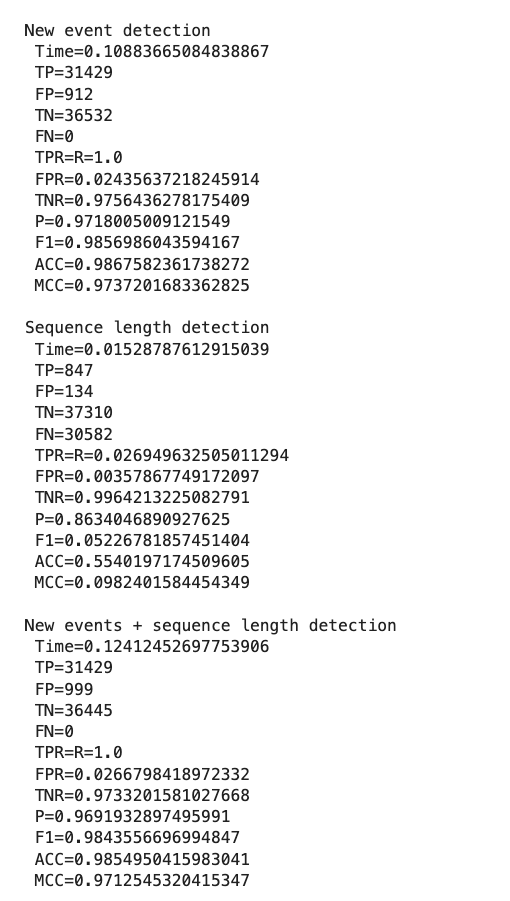

> 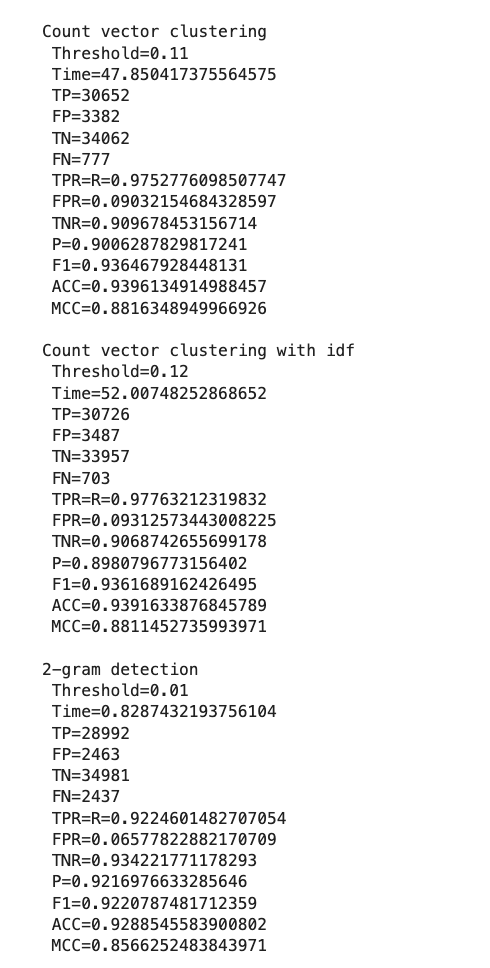

> 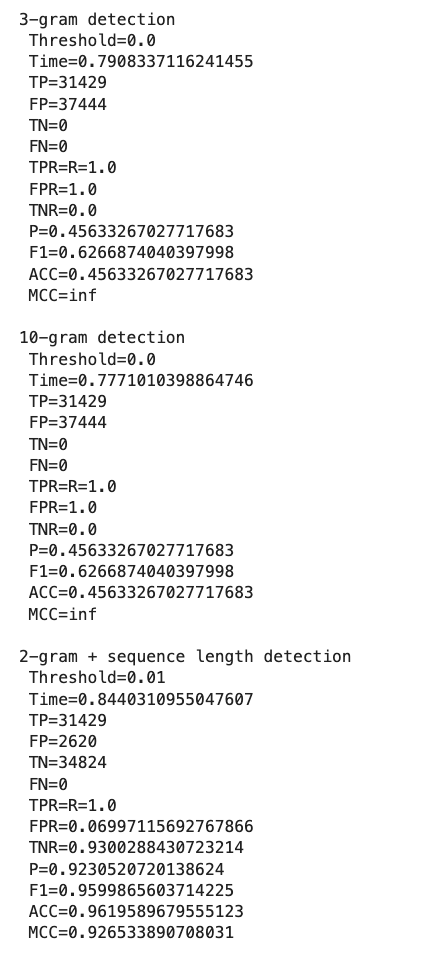

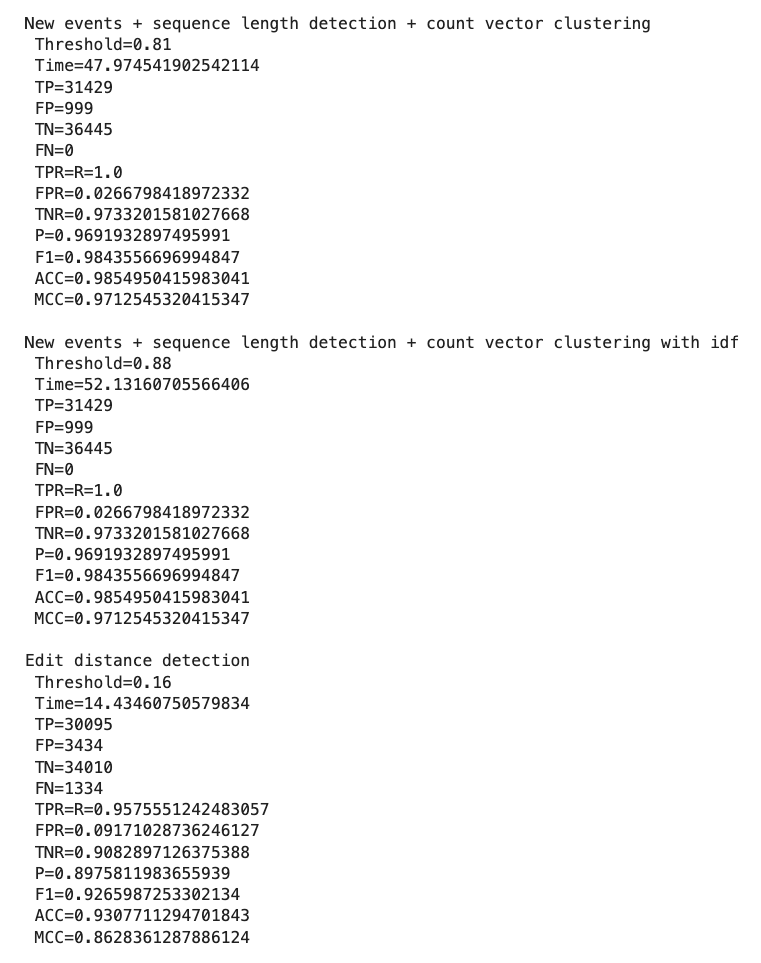

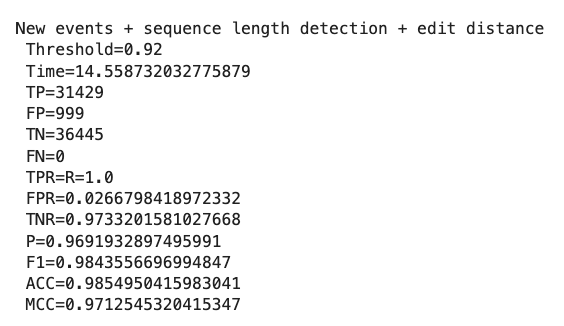